<a href="https://colab.research.google.com/github/M-Jak/Finki/blob/main/Vnp/Lab4/Copy_of_Laboratory_exercise_4_Introduction_to_Data_Science_(20_12_2023).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Requirements

In [435]:
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Laboratory Exercise - Run Mode (8 points)

## Introduction
In this laboratory assignment, the primary objective is to use Long Short-Term Memory (LSTM) networks for time series forecasting in order to predict the current **mean temperature** in the city of Delhi. To accomplish this use data from the past three days, which includes information such as the **mean temperature**, **humidity**, **wind speed**, and **mean pressure**. The goal is to employ LSTM, a type of recurrent neural network, to effectively forecast the future mean temperature based on the provided historical data.

**Note: You are required to perform this laboratory assignment on your local machine.**

## The Climate Dataset

## Downloading the Climate Dataset

In [436]:
!gdown 1kczX2FpFTH1QEsDeg6dszXM3Azwyd7XC

Downloading...
From: https://drive.google.com/uc?id=1kczX2FpFTH1QEsDeg6dszXM3Azwyd7XC
To: /content/climate-data.csv
100% 78.1k/78.1k [00:00<00:00, 81.9MB/s]


In [437]:
data

,meantemp,humidity,wind_speed,meanpressure,meantemp_3,humidity_3,wind_speed_3,meanpressure_3,meantemp_2,humidity_2,wind_speed_2,meanpressure_2,meantemp_1,humidity_1,wind_speed_1,meanpressure_1
3,8.666667,71.333333,1.233333,1017.166667,10.000000,84.500000,0.000000,1015.666667,7.400000,92.000000,2.980000,1017.800000,7.166667,87.000000,4.633333,1018.666667
4,6.000000,86.833333,3.700000,1016.500000,7.400000,92.000000,2.980000,1017.800000,7.166667,87.000000,4.633333,1018.666667,8.666667,71.333333,1.233333,1017.166667
5,7.000000,82.800000,1.480000,1018.000000,7.166667,87.000000,4.633333,1018.666667,8.666667,71.333333,1.233333,1017.166667,6.000000,86.833333,3.700000,1016.500000
6,7.000000,78.600000,6.300000,1020.000000,8.666667,71.333333,1.233333,1017.166667,6.000000,86.833333,3.700000,1016.500000,7.000000,82.800000,1.480000,1018.000000
7,8.857143,63.714286,7.142857,1018.714286,6.000000,86.833333,3.700000,1016.500000,7.000000,82.800000,1.480000,1018.000000,7.000000,78.600000,6.300000,1020.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1457,17.217391,68.043478,3.547826,1015.565217,14.000000,94.300000,9.085000,1014.350000,17.142857,74.857143,8.784211,1016.952381,16.850000,67.550000,8.335000,1017.200000
1458,15.238095,87.857143,6.000000,1016.904762,17.142857,74.857143,8.784211,1016.952381,16.850000,67.550000,8.335000,1017.200000,17.217391,68.043478,3.547826,1015.565217
1459,14.095238,89.666667,6.266667,1017.904762,16.850000,67.550000,8.335000,1017.200000,17.217391,68.043478,3.547826,1015.565217,15.238095,87.857143,6.000000,1016.904762
1460,15.052632,87.000000,7.325000,1016.100000,17.217391,68.043478,3.547826,1015.565217,15.238095,87.857143,6.000000,1016.904762,14.095238,89.666667,6.266667,1017.904762


## Exploring the Climate Dataset
This dataset consists of daily weather records for the city of Delhi spanning a period of 4 years (from 2013 to 2017). The dataset includes the following attributes:

- date - date in the format YYYY-MM-DD,
- meantemp - mean temperature averaged from multiple 3-hour intervals in a day,
- humidity - humidity value for the day (measured in grams of water vapor per cubic meter volume of air),
- wind_speed - wind speed measured in kilometers per hour, and
- meanpressure - pressure reading of the weather (measured in atm).

*Note: The dataset is complete, with no missing values in any of its entries.*

Load the dataset into a `pandas` data frame.

In [438]:
data = pd.read_csv('/content/climate-data.csv')

Explore the dataset using visualizations of your choice.

In [439]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [440]:
data.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


<Axes: ylabel='Frequency'>

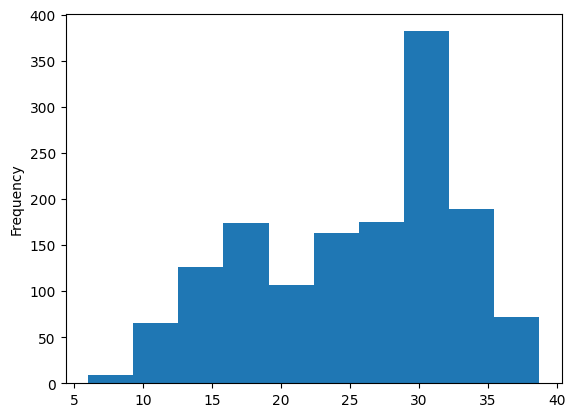

In [441]:
data.meantemp.plot.hist()

## Feauture Extraction
Apply a lag of one, two, and three days to each feature, creating a set of features representing the meteorological conditions from the previous three days. To maintain dataset integrity, eliminate any resulting missing values at the beginning of the dataset.

*Be careful when extracting the features. For each day, ensure that features are obtained sequentially, starting with those from 3 days ago, followed by features from 2 days ago, and finally, features from 1 day ago. This becomes crucial when reshaping the train and test sets later on.*

Hint: Use `df['column_name'].shift(period)`. Check the documentation at https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html.

In [442]:
data = data.drop(columns=['date'])

In [443]:
data

,meantemp,humidity,wind_speed,meanpressure
0,10.000000,84.500000,0.000000,1015.666667
1,7.400000,92.000000,2.980000,1017.800000
2,7.166667,87.000000,4.633333,1018.666667
3,8.666667,71.333333,1.233333,1017.166667
4,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
1457,17.217391,68.043478,3.547826,1015.565217
1458,15.238095,87.857143,6.000000,1016.904762
1459,14.095238,89.666667,6.266667,1017.904762
1460,15.052632,87.000000,7.325000,1016.100000


In [444]:
columns=list(data.columns)
features = []
for i in range(3,0,-1):
  for column in columns:
    data[f'{column}_{i}']=data[column].shift(i)
    features.append(f'{column}_{i}')

In [445]:
data = data.dropna(axis=0)

In [446]:
data

,meantemp,humidity,wind_speed,meanpressure,meantemp_3,humidity_3,wind_speed_3,meanpressure_3,meantemp_2,humidity_2,wind_speed_2,meanpressure_2,meantemp_1,humidity_1,wind_speed_1,meanpressure_1
3,8.666667,71.333333,1.233333,1017.166667,10.000000,84.500000,0.000000,1015.666667,7.400000,92.000000,2.980000,1017.800000,7.166667,87.000000,4.633333,1018.666667
4,6.000000,86.833333,3.700000,1016.500000,7.400000,92.000000,2.980000,1017.800000,7.166667,87.000000,4.633333,1018.666667,8.666667,71.333333,1.233333,1017.166667
5,7.000000,82.800000,1.480000,1018.000000,7.166667,87.000000,4.633333,1018.666667,8.666667,71.333333,1.233333,1017.166667,6.000000,86.833333,3.700000,1016.500000
6,7.000000,78.600000,6.300000,1020.000000,8.666667,71.333333,1.233333,1017.166667,6.000000,86.833333,3.700000,1016.500000,7.000000,82.800000,1.480000,1018.000000
7,8.857143,63.714286,7.142857,1018.714286,6.000000,86.833333,3.700000,1016.500000,7.000000,82.800000,1.480000,1018.000000,7.000000,78.600000,6.300000,1020.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1457,17.217391,68.043478,3.547826,1015.565217,14.000000,94.300000,9.085000,1014.350000,17.142857,74.857143,8.784211,1016.952381,16.850000,67.550000,8.335000,1017.200000
1458,15.238095,87.857143,6.000000,1016.904762,17.142857,74.857143,8.784211,1016.952381,16.850000,67.550000,8.335000,1017.200000,17.217391,68.043478,3.547826,1015.565217
1459,14.095238,89.666667,6.266667,1017.904762,16.850000,67.550000,8.335000,1017.200000,17.217391,68.043478,3.547826,1015.565217,15.238095,87.857143,6.000000,1016.904762
1460,15.052632,87.000000,7.325000,1016.100000,17.217391,68.043478,3.547826,1015.565217,15.238095,87.857143,6.000000,1016.904762,14.095238,89.666667,6.266667,1017.904762


## Dataset Splitting
Partition the dataset into training and testing sets with an 90:10 ratio.

**WARNING: DO NOT SHUFFLE THE DATASET.**



In [447]:
X, Y = data[features], data['meantemp']

## Feauture Scaling
Scale the extracted features using an appropriate scaler.

In [448]:
scaler = MinMaxScaler()

In [449]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, shuffle=False)

In [450]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
Y_train = scaler.fit_transform(Y_train.values.reshape(-1, 1))

## Feature Reshaping

Reshape the feature dimensions into the shape `(samples, timesteps, features)`.

In [451]:
X_train = X_train.reshape(X_train.shape[0], 3, 4)
X_test = X_test.reshape(X_test.shape[0], 3, 4)

In [452]:
X_train

array([[[0.12227074, 0.84037162, 0.        , 0.09570351],
        [0.04279476, 0.92905405, 0.07058266, 0.09599301],
        [0.0356623 , 0.86993243, 0.10974262, 0.09611062]],

       [[0.04279476, 0.92905405, 0.07058266, 0.09599301],
        [0.0356623 , 0.86993243, 0.10974262, 0.09611062],
        [0.08151383, 0.68468468, 0.02921206, 0.09590706]],

       [[0.0356623 , 0.86993243, 0.10974262, 0.09611062],
        [0.08151383, 0.68468468, 0.02921206, 0.09590706],
        [0.        , 0.86796171, 0.08763619, 0.09581659]],

       ...,

       [[0.81195415, 0.59279983, 0.12908574, 0.09337389],
        [0.82872392, 0.59665916, 0.18777304, 0.09341159],
        [0.84978166, 0.57038288, 0.10232117, 0.09348698]],

       [[0.82872392, 0.59665916, 0.18777304, 0.09341159],
        [0.84978166, 0.57038288, 0.10232117, 0.09348698],
        [0.7356623 , 0.73986486, 0.16406127, 0.09368602]],

       [[0.84978166, 0.57038288, 0.10232117, 0.09348698],
        [0.7356623 , 0.73986486, 0.16406127, 0.09

## Long Short-Term Memory (LSTM) Network
Build a Long Short-Term Memory (LSTM) Network for forecasting the current **mean temperature** based on the extracted features from the previous three days.

Define the forecasting model using the **Keras Sequential API** (`keras.models.Sequential`), incorporating one or more LSTM layers along with additional relevant layers (`keras.layers`). Be cautious when specifying the configuration of the final layer to ensure proper model output for the forecasting task.

In [453]:
model = Sequential()
model.add(LSTM(100,  activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(LSTM(50,  activation='relu'))
model.add(Dense(1, activation='linear'))

Compile the previously defined model specifying **loss function** (`keras.losses`), **optimizer** (`keras.optimizers`) and **evaluation metrics** (`keras.metics`).

In [454]:
model.compile(loss=keras.losses.MeanSquaredError() , optimizer=keras.optimizers.Adam(), metrics=[keras.metrics.MeanSquaredError(), keras.metrics.MeanAbsoluteError() ])

Train the model on the training set, specifying the **batch size** and **number of epochs** for the training process. Allocate 20% of the samples for **validation**, and ensure that the dataset remains **unshuffled** during training.

In [455]:
history = model.fit(X_train, Y_train, batch_size=16, validation_split=0.2, epochs=20, shuffle=False)

Epoch 1/20
66/66 [==============================] - 4s 18ms/step - loss: 0.1245 - mean_squared_error: 0.1245 - mean_absolute_error: 0.2818 - val_loss: 0.0231 - val_mean_squared_error: 0.0231 - val_mean_absolute_error: 0.1272
Epoch 2/20
66/66 [==============================] - 1s 12ms/step - loss: 0.0192 - mean_squared_error: 0.0192 - mean_absolute_error: 0.1118 - val_loss: 0.0105 - val_mean_squared_error: 0.0105 - val_mean_absolute_error: 0.0835
Epoch 3/20
66/66 [==============================] - 1s 12ms/step - loss: 0.0075 - mean_squared_error: 0.0075 - mean_absolute_error: 0.0680 - val_loss: 0.0065 - val_mean_squared_error: 0.0065 - val_mean_absolute_error: 0.0626
Epoch 4/20
66/66 [==============================] - 1s 12ms/step - loss: 0.0048 - mean_squared_error: 0.0048 - mean_absolute_error: 0.0538 - val_loss: 0.0050 - val_mean_squared_error: 0.0050 - val_mean_absolute_error: 0.0558
Epoch 5/20
66/66 [==============================] - 1s 19ms/step - loss: 0.0055 - mean_squared_error

Create a line plot illustrating both the **training** and **validation loss** over the training epochs.



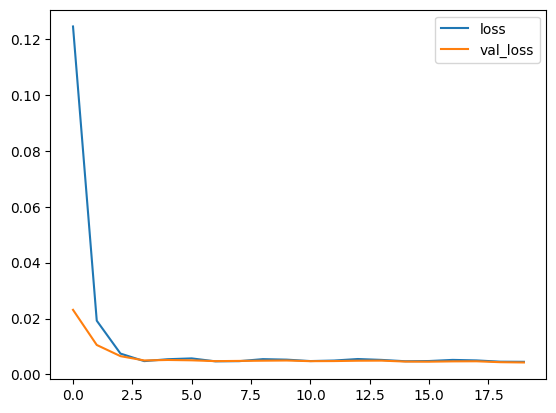

In [456]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

Use the trained model to make predictions for the test set.

In [457]:
preds = model.predict(X_test)

5/5 [==============================] - 0s 4ms/step


Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [458]:
preds = scaler.inverse_transform(preds)

Create a line plot in order to compare the actual and predicted mean temperatures for the test set.

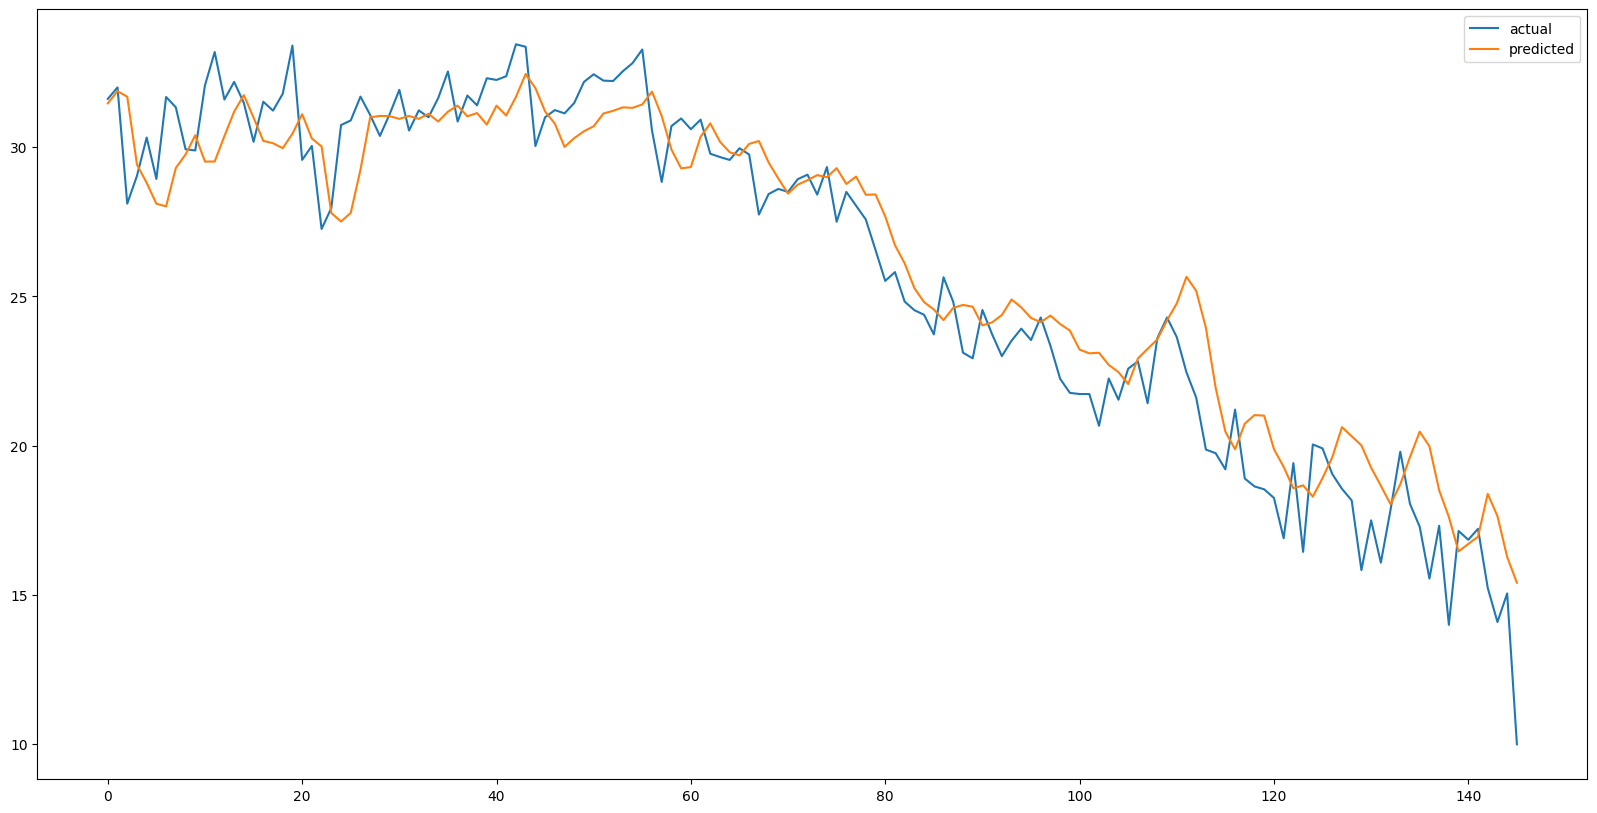

In [459]:
plt.figure(figsize=(20, 10))
plt.plot(Y_test.values, label='actual')
plt.plot(preds, label='predicted')
plt.legend()
plt.show()

# Laboratory Exercise - Bonus Task (+ 2 points)

As part of the bonus task in this laboratory assignment, your objective is to perform a sentiment analysis on a dataset consisting of wine reviews. The dataset contains two attributes: **description* and **points**. The description is a brief text describing the wine and the points which represents a quality metric ranging from 1 to 100. If some wine has at least 90 points it is considered **exceptional**. Your task involves predicting if some wine is exceptional based on its review.

The greater part of the code for the solution is already given. You need to define a tokenizer to tokenize the given texts and a deep neural network model that will be used for the classification task at hand. Fill in only the missing code blocks.

## Requirements

In [460]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.models import Sequential
import keras
from keras.layers import Dense, Embedding, Conv1D, MaxPooling1D, LSTM, Flatten
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Downloading the Wine Reviews Dataset

In [461]:
!gdown 1fz9449M9Owofy6CYrKzkGwXKesI32B8u

Downloading...
From: https://drive.google.com/uc?id=1fz9449M9Owofy6CYrKzkGwXKesI32B8u
To: /content/wine-reviews.csv
100% 32.5M/32.5M [00:00<00:00, 190MB/s]


## Exploring the Climate Dataset

Load the dataset into a `pandas` data frame.

In [462]:
df = pd.read_csv('wine-reviews.csv')

In [463]:
df.head()

,description,points
0,"Aromas include tropical fruit, broom, brimston...",87
1,"This is ripe and fruity, a wine that is smooth...",87
2,"Tart and snappy, the flavors of lime flesh and...",87
3,"Pineapple rind, lemon pith and orange blossom ...",87
4,"Much like the regular bottling from 2012, this...",87


## Feature Extraction

Extract the feature `exceptional` for each wine review.

In [464]:
df['exceptional'] = df['points'].apply(lambda elem: 1 if elem >= 90 else 0)

## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

In [465]:
X, Y = df['description'], df['exceptional']

In [466]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

## Text Tokenization

Use tokenizer to convert raw text into a sequence of tokens.

In [467]:
max_tokens=56

In [468]:
tokenizer = Tokenizer(num_words=max_tokens)
tokenizer.fit_on_texts(X_train.values)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

## Padding
Pad each sequence to maximum length of 16.

In [469]:
maxlen=16

X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)

In [470]:
X_train.shape, X_test.shape

((103976, 16), (25995, 16))

In [471]:
Y

0         0
1         0
2         0
3         0
4         0
         ..
129966    1
129967    1
129968    1
129969    1
129970    1
Name: exceptional, Length: 129971, dtype: int64

## Deep Neural Network

Define Deep Neural Network model to predict if a specific wine is exceptional or not based on the tokenized and padded wine reviews.

In [472]:
model = Sequential()
model.add(Embedding(max_tokens, 32, input_length=X_train.shape[1]))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

Compile the previously defined model specifying loss function, optimizer and evaluation metrics.

In [473]:
model.compile(loss=keras.losses.BinaryCrossentropy(), optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=[keras.metrics.Precision(), keras.metrics.Recall()])

Fit the compiled model on the train set specifying the percent for validation, batch_size, and number of epochs.

In [474]:
history = model.fit(X_train, y_train, batch_size=128, validation_split=0.2, epochs=3)

Epoch 1/3
650/650 [==============================] - 26s 34ms/step - loss: 0.6005 - precision_6: 0.5992 - recall_6: 0.3662 - val_loss: 0.5774 - val_precision_6: 0.6218 - val_recall_6: 0.4593
Epoch 2/3
650/650 [==============================] - 20s 31ms/step - loss: 0.5784 - precision_6: 0.6237 - recall_6: 0.4672 - val_loss: 0.5736 - val_precision_6: 0.6581 - val_recall_6: 0.3768
Epoch 3/3
650/650 [==============================] - 22s 34ms/step - loss: 0.5726 - precision_6: 0.6292 - recall_6: 0.4777 - val_loss: 0.5663 - val_precision_6: 0.6326 - val_recall_6: 0.4845


Create a line plot illustrating both the **training** and **validation loss** over the training epochs.

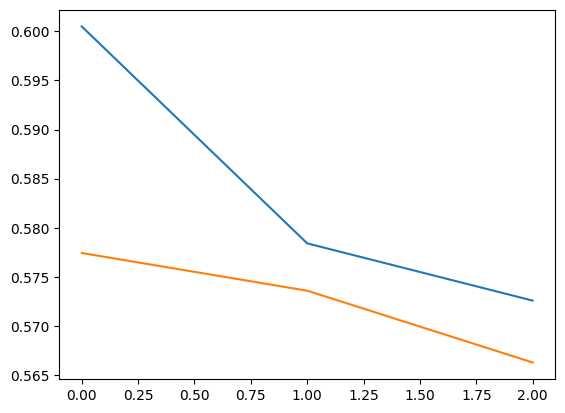

In [475]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.show()

Use the trained model to make predictions for the test set.

In [476]:
y_pred = model.predict(X_test)

813/813 [==============================] - 4s 4ms/step


Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [477]:
print(classification_report(y_test, np.round(y_pred)))

              precision    recall  f1-score   support

           0       0.73      0.83      0.78     16148
           1       0.64      0.48      0.55      9847

    accuracy                           0.70     25995
   macro avg       0.68      0.66      0.66     25995
weighted avg       0.69      0.70      0.69     25995

